**Step - 1:** Gathering Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

**Step - 2:** Data Preprocessing

In [2]:
#Read the training & test data
ldata = pd.read_excel('/content/indian_liver_patient.xlsx')

In [3]:
ldata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
ldata.shape

(583, 11)

In [5]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
ldata.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [7]:
lvdata = ldata.fillna("0")

In [8]:
#Check for any null values
lvdata.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


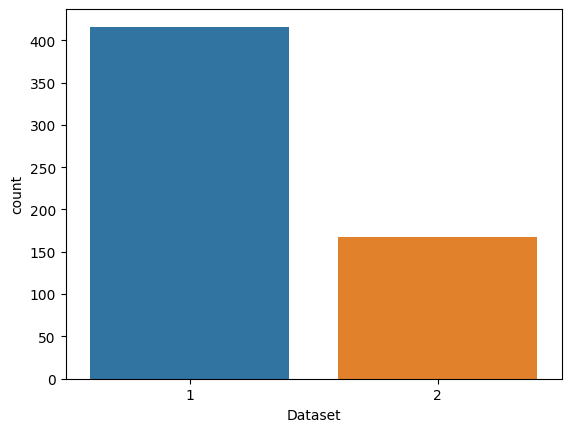

In [9]:
sns.countplot(data=lvdata, x = 'Dataset', label='Count')

LD, NLD = lvdata['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [10]:
lvdata.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4,1


In [11]:
lvdata.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.1,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.0,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.0,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.5,2


In [12]:
lvdata.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.000000


In [13]:
lvdata["Gender"].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [14]:
lvdata["Albumin"].value_counts()

3.0    45
4.0    37
2.9    29
3.1    28
3.2    26
3.9    25
2.7    24
2.5    24
3.5    23
2.6    21
2.0    21
3.7    21
3.3    21
3.4    21
3.6    18
2.8    18
2.4    17
4.1    16
3.8    15
4.3    14
2.1    14
4.2    12
2.2    12
1.8    12
2.3    12
1.6     8
4.4     8
1.9     7
4.5     6
4.6     4
4.9     4
1.7     3
1.5     3
1.4     3
4.7     3
4.8     2
0.9     2
5.5     2
5.0     1
1.0     1
Name: Albumin, dtype: int64

In [15]:
# See the min, max, mean values
print('The highest Albumin was of:',lvdata['Albumin'].max())
print('The lowest Albumin was of:',lvdata['Albumin'].min())
print('The average Albumin in the data:',lvdata['Albumin'].mean())

The highest Albumin was of: 5.5
The lowest Albumin was of: 0.9
The average Albumin in the data: 3.141852487135506


**Step - 3:** Data Visualization

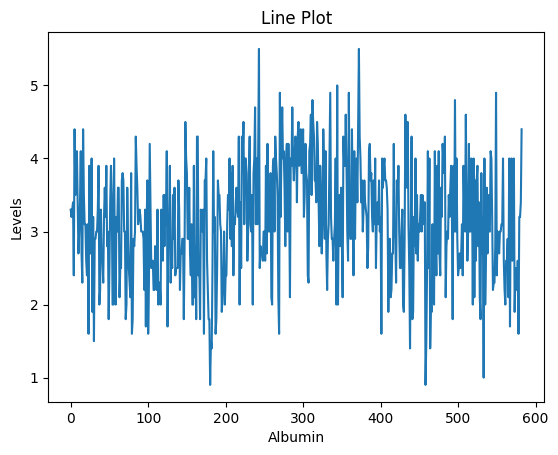

In [16]:
import matplotlib.pyplot as plt

# Line plot
plt.plot(lvdata['Albumin'])
plt.xlabel("Albumin")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()

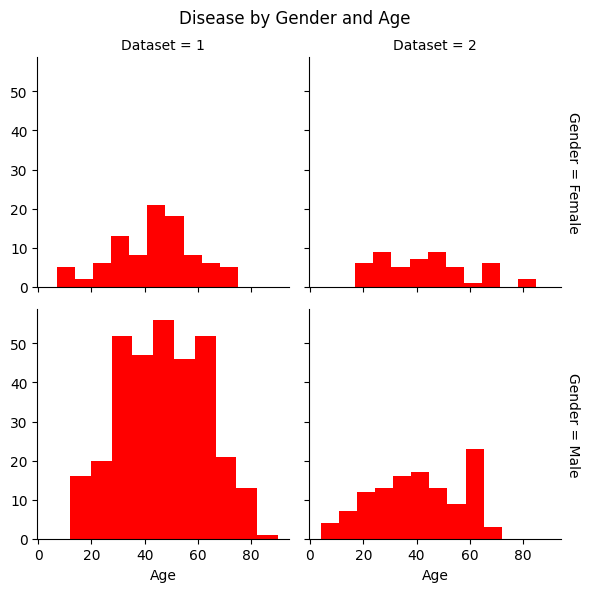

In [17]:
g = sns.FacetGrid(lvdata, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

**Normalization**

In [18]:
lvdata[1:5]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4,1


In [19]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(lvdata[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin']], axis=0)
scaled_df = pd.DataFrame(d, columns=['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'])
scaled_df.head()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
0,0.056579,0.004126,0.001304,0.020455,0.003321,0.002413,0.042844,0.042172
1,0.053967,0.064245,0.071737,0.076461,0.013285,0.013408,0.047255,0.040894
2,0.053967,0.043027,0.053476,0.053599,0.012455,0.009117,0.044104,0.042172
3,0.050486,0.005894,0.005217,0.019908,0.002906,0.002682,0.042844,0.043450
4,0.062672,0.022987,0.026086,0.021330,0.005605,0.007911,0.045995,0.030670


In [20]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report #for confusion matrix
from sklearn.linear_model import LogisticRegression,LinearRegression #logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [21]:
train, test = train_test_split(lvdata, test_size=0.3, random_state=0, stratify=lvdata['Dataset'])

train_X = train[train.columns[:-1]]
train_Y = train[train.columns[-1]]
test_X = test[test.columns[:-1]]
test_Y = test[test.columns[-1]]

X = lvdata[lvdata.columns[:-1]]
Y = lvdata['Dataset']

len(train_X), len(train_Y), len(test_X), len(test_Y)


(408, 408, 175, 175)

In [22]:
# Create a label encoder object
le = LabelEncoder()

# Assuming 'Gender' is the column causing the issue, we transform it
train_X['Gender'] = le.fit_transform(train_X['Gender'])
test_X['Gender'] = le.transform(test_X['Gender'])

# Now you can scale your features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

# Train the model
model = LogisticRegression()
model.fit(train_X_scaled, train_Y.values.ravel())

# Make predictions
prediction3 = model.predict(test_X_scaled)

# Print the accuracy and classification report
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y.values.ravel()))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)


The accuracy of the Logistic Regression is 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.90      0.82       125
           2       0.50      0.26      0.34        50

    accuracy                           0.71       175
   macro avg       0.63      0.58      0.58       175
weighted avg       0.68      0.71      0.68       175



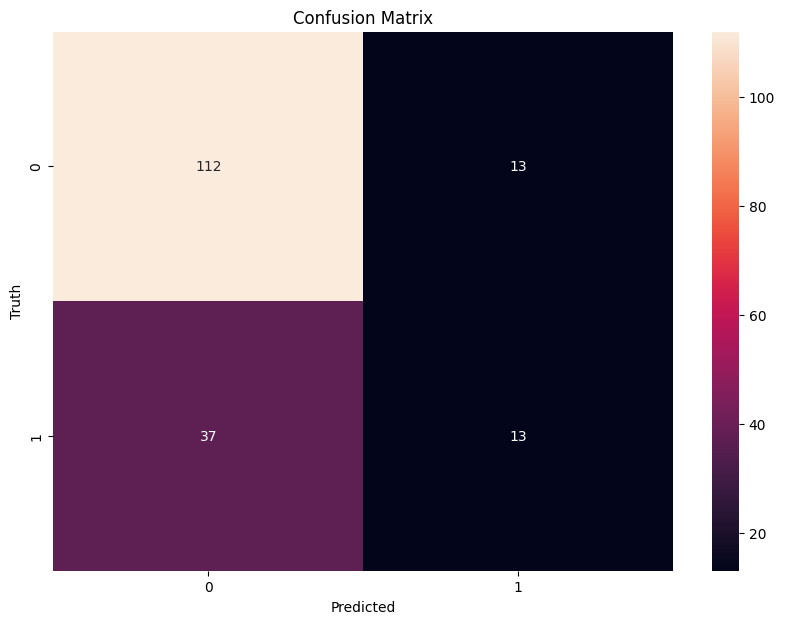

In [23]:
# Calculate confusion matrix
cm = confusion_matrix(test_Y.values.ravel(), prediction3)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()
